In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from utils.load_dataframe import load_dataframe

pd.set_option('display.max_columns', 50)

In [2]:
orders = load_dataframe("orders")
items = load_dataframe("order_items")
products = load_dataframe("products")
customers = load_dataframe("customer")

sellers = load_dataframe("sellers")

In [3]:
full_df = orders.merge(items, on='order_id')
full_df = full_df.merge(products, on='product_id')
full_df = full_df.merge(customers, on='customer_id')
full_df = full_df.merge(sellers, on='seller_id')

# Criar coluna de faturamento para cada pedido
full_df['revenue'] = full_df['price'] * full_df['order_item_id']


order_month
2016-09        435.23
2016-10      56103.79
2016-12         10.90
2017-01     142077.30
2017-02     269786.66
2017-03     412016.43
2017-04     399336.79
2017-05     562388.09
2017-06     471648.72
2017-07     558035.60
2017-08     655335.69
2017-09     753890.26
2017-10     766159.48
2017-11    1176425.07
2017-12     815042.73
2018-01    1072699.91
2018-02     973071.91
2018-03    1109066.72
2018-04    1130916.12
2018-05    1137417.24
2018-06     975084.01
2018-07    1011982.19
2018-08     948662.77
2018-09        145.00
Freq: M, Name: revenue, dtype: float64

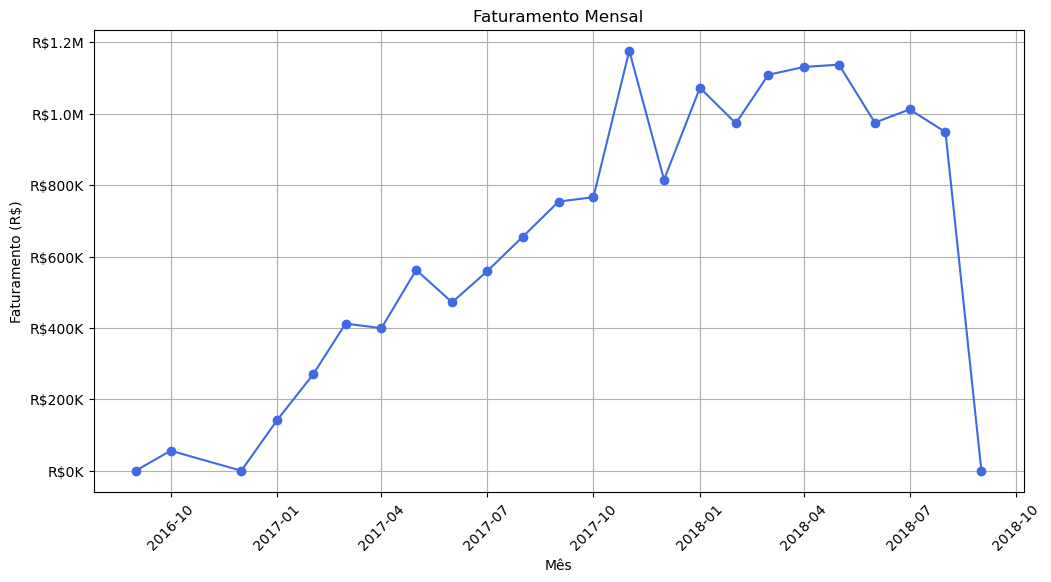

,ticket,pedidos,ticket_medio
order_month,,,
2016-09,435.23,3,145.076667
2016-10,56103.79,308,182.155162
2016-12,10.90,1,10.900000
2017-01,142077.30,789,180.072624
2017-02,269786.66,1733,155.676088
2017-03,412016.43,2641,156.007736
2017-04,399336.79,2391,167.016642
2017-05,562388.09,3660,153.657948
2017-06,471648.72,3217,146.611352


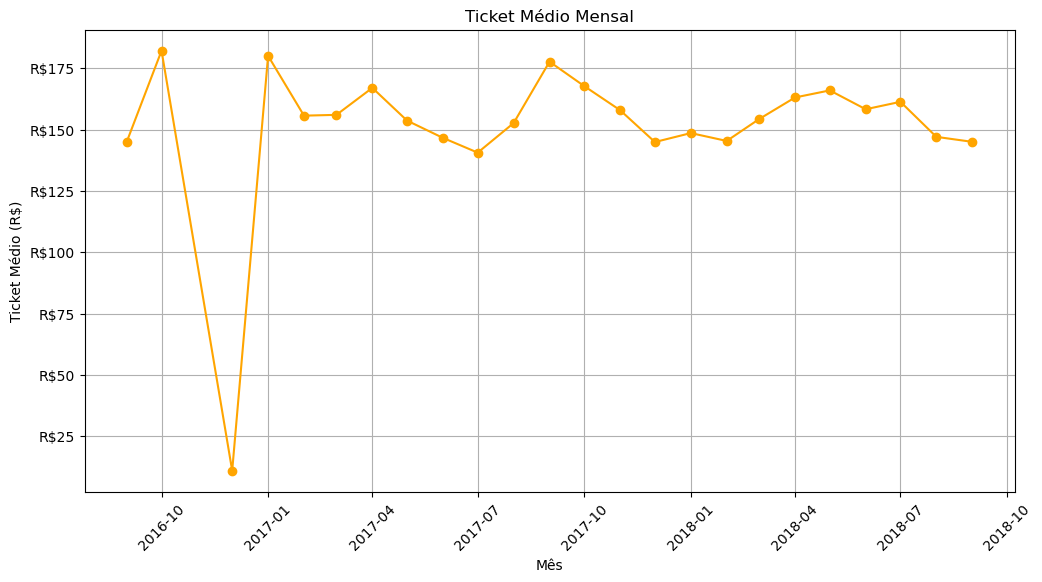

In [ ]:
# Faturamento Mensal
full_df['order_month'] = full_df['order_purchase_timestamp'].dt.to_period('M')
revenue_by_month = full_df.groupby('order_month')['revenue'].sum()

# Ticket médio mensal
ticket_by_month = (
    full_df
        .groupby('order_month')
        .agg(ticket=('revenue', 'sum'), pedidos=('order_id', 'nunique'))
)
ticket_by_month['ticket_medio'] = (
    ticket_by_month['ticket'] / ticket_by_month['pedidos']
)

display(revenue_by_month)

# === Gráfico de Faturamento Mensal ===
plt.figure(figsize=(12,6))
plt.plot(
    revenue_by_month.index.to_timestamp(),
    revenue_by_month.values,
    marker='o',
    label='Faturamento',
    color='royalblue'
)
plt.title("Faturamento Mensal")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.grid(True)

# Formata eixo Y (em milhões e milhares)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"R${x/1_000_000:.1f}M" if x >= 1_000_000 else f"R${x/1_000:.0f}K"
))
plt.show()

display(ticket_by_month)

# === Gráfico de Ticket Médio ===
plt.figure(figsize=(12,6))
plt.plot(
    ticket_by_month.index.to_timestamp(),
    ticket_by_month['ticket_medio'],
    marker='o',
    color='orange'
)
plt.title("Ticket Médio Mensal")
plt.xlabel("Mês")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45)
plt.grid(True)

# Formata eixo Y também como moeda
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f"R${x:,.0f}".replace(",", ".")
))
plt.show()


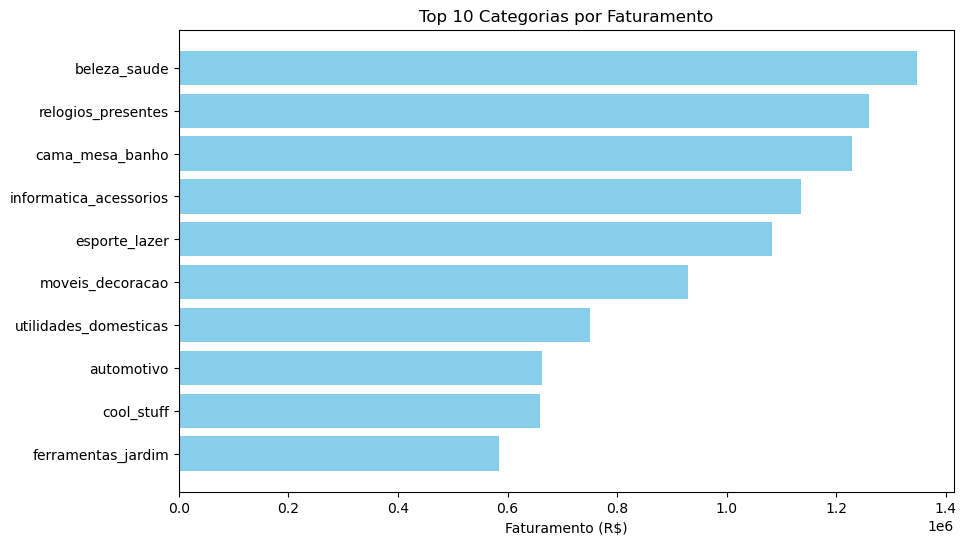

product_category_name
beleza_saude              1347468.49
relogios_presentes        1259634.58
cama_mesa_banho           1228795.46
informatica_acessorios    1135454.64
esporte_lazer             1082435.42
moveis_decoracao           929520.95
utilidades_domesticas      750233.73
automotivo                 662861.88
cool_stuff                 659590.61
ferramentas_jardim         584155.02
Name: revenue, dtype: float64

seller_state
SP    10010990.91
PR     1422646.61
MG     1151720.57
RJ      911067.26
SC      692288.78
RS      432207.39
BA      313137.92
DF      106817.51
PE      100226.82
GO       74682.23
Name: revenue, dtype: float64

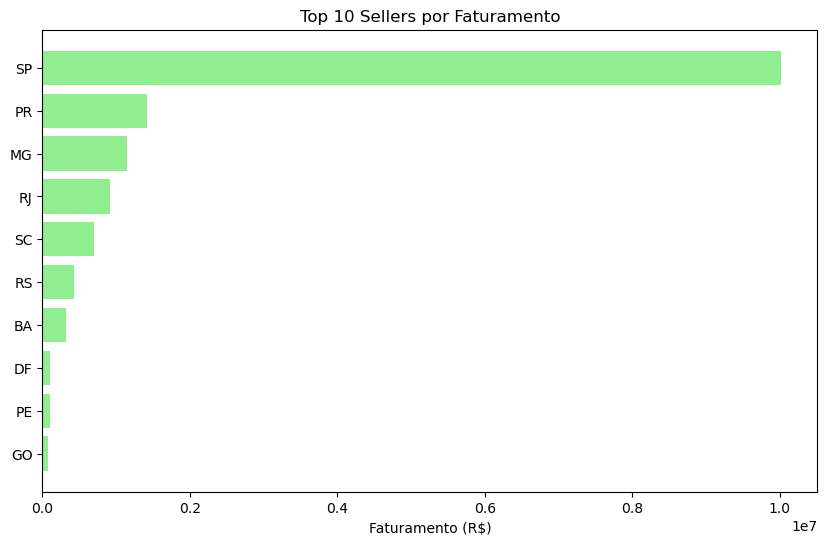

In [23]:

# Top 10 categorias por faturamento
top_categories = (
    full_df
        .groupby('product_category_name', observed=True)['revenue']
        .sum()
        .sort_values(ascending=False)
        .head(10)

)

plt.figure(figsize=(10,6))
plt.barh(top_categories.index[::-1], top_categories.values[::-1], color='skyblue')
plt.title("Top 10 Categorias por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.show()

display(top_categories)

# Top 10 vendedores por faturamento
top_sellers = (
    full_df
        .groupby('seller_state')['revenue']
        .sum()
        .sort_values(ascending=False)
        .head(10)
)

display(top_sellers)

plt.figure(figsize=(10,6))
plt.barh(top_sellers.index[::-1], top_sellers.values[::-1], color='lightgreen')
plt.title("Top 10 Sellers por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.show()


# Conclusões: Performance de Vendas

- A Olist apresenta **crescimento contínuo de vendas** ao longo de 2017, com picos no fim do ano.
- O **ticket médio** é estável, mas há potencial para aumento.
- As **categorias mais lucrativas** são de uso cotidiano e tecnologia.
- O **Sudeste concentra** os principais vendedores e oportunidades logísticas.